<a href="https://colab.research.google.com/github/Yassmina-Abdo/realtime-head-pose-estimation/blob/main/Notebooks/preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**1- importing libraries**

In [ ]:
from google.colab import drive
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler, RobustScaler, StandardScaler, normalize,  Normalizer, PowerTransformer
from sklearn.decomposition import PCA
from sklearn.utils import shuffle
from google.colab.patches import cv2_imshow 
import cv2

import math
import seaborn as sns


In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


## 2- Reading the Data with 68 point and labels 

In [ ]:
path ='/content/drive/MyDrive/Head Pose Estimation ML Project/Dataset/Data/data68.csv'

In [ ]:
def read_file(path):
  df=pd.read_csv(path)
  return df 

In [ ]:
full_data_df = read_file(path)

In [ ]:
full_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Columns: 140 entries, x1 to img
dtypes: float64(139), object(1)
memory usage: 2.1+ MB


In [ ]:
full_data_df.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,y63,y64,y65,y66,y67,y68,yaw,pitch,roll,img
0,279.05283,281.67548,285.68677,287.899540,284.69318,275.74564,261.69530,252.67186,252.65305,264.91882,...,309.33150,311.98444,318.51562,319.20294,317.46520,313.99393,69.062935,-48.795550,-31.882296,image03258
1,106.78756,107.11935,111.29989,115.847370,124.11620,140.81512,161.30240,185.51682,216.90814,245.06805,...,304.52728,305.67432,307.28482,319.07630,319.09350,316.20816,-13.392587,-6.686405,5.489456,image03247
2,123.74660,123.77142,123.46777,127.416306,139.26894,162.47030,190.68597,213.83716,222.32365,212.37135,...,316.44590,320.29510,330.61310,324.62158,320.40310,315.17682,-82.824690,-31.047533,61.351288,image03252
3,241.90388,241.49951,242.88312,242.789640,240.46445,236.20209,231.27866,229.64096,238.73349,256.18690,...,298.07925,300.00455,305.23682,304.31770,302.94162,300.31104,47.252384,-21.523932,0.100378,image03237
4,106.61653,113.84815,124.36699,134.661160,146.94208,164.04477,182.50476,206.71774,243.18040,279.36014,...,316.60840,315.73355,318.12878,319.93948,322.06128,323.02048,3.578812,5.349906,-7.209053,image03250


## 3- Some Statistics & Visualizations 

In [ ]:
full_data_df.describe()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,y62,y63,y64,y65,y66,y67,y68,yaw,pitch,roll
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,149.718688,152.113179,156.829241,161.498873,168.151080,178.698998,190.683158,206.126739,229.185386,252.139713,...,306.413615,306.141130,306.201093,308.393358,313.973390,314.897967,313.851623,0.806547,-6.138931,-1.975500
std,59.672788,58.092475,56.906871,55.078724,50.565021,42.259368,32.965426,26.903775,25.625110,27.110694,...,10.900385,10.758188,10.911467,12.102787,11.728720,11.899011,11.648587,37.482043,35.988570,41.024606
min,-65.141365,-60.022003,-51.570732,-40.715030,-18.620157,19.966427,70.056160,98.584240,119.978930,117.472960,...,229.170970,238.149550,240.426380,223.685170,246.933440,234.098950,223.240620,-351.226930,-713.745100,-972.272800
25%,109.946310,112.587662,116.569265,122.258706,132.425358,149.270252,169.422638,190.987323,215.788462,237.282800,...,299.945060,299.918035,299.640275,301.898740,307.109938,307.806780,307.245930,-16.859081,-14.811133,-10.015671
50%,128.190330,129.386400,136.064970,141.836890,151.342425,167.026480,185.000840,203.907645,228.626095,253.304935,...,306.768985,306.414825,306.708450,308.852005,314.597940,315.429715,314.469330,1.128854,-7.005438,-1.036931
75%,171.145022,174.019178,181.380260,186.516525,193.215323,200.848388,208.786400,220.502052,240.992603,266.496112,...,313.380325,313.146557,313.297980,315.713750,321.673458,322.546308,321.178675,19.177740,2.302842,7.699269
max,362.664580,364.748300,370.063780,376.669040,373.388000,357.916350,331.834780,332.619540,340.516000,352.252400,...,365.659030,364.765350,368.830500,393.602330,377.756380,377.990300,374.957920,187.786940,893.746500,333.999700


In [ ]:
# Spliiting x and y 
x_data = full_data_df.iloc[:,0:68]
x_data

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x59,x60,x61,x62,x63,x64,x65,x66,x67,x68
0,279.05283,281.675480,285.686770,287.899540,284.69318,275.74564,261.69530,252.67186,252.65305,264.91882,...,222.08615,222.03777,223.84404,217.05966,217.19394,223.41469,245.58133,227.44647,223.86053,222.87137
1,106.78756,107.119350,111.299890,115.847370,124.11620,140.81512,161.30240,185.51682,216.90814,245.06805,...,215.30399,201.19077,183.33911,218.27037,230.74034,241.73907,261.78378,239.47865,228.62605,216.99140
2,123.74660,123.771420,123.467770,127.416306,139.26894,162.47030,190.68597,213.83716,222.32365,212.37135,...,244.57788,240.68582,231.97562,240.66364,243.37637,241.49823,227.15976,240.53564,242.29385,243.03738
3,241.90388,241.499510,242.883120,242.789640,240.46445,236.20209,231.27866,229.64096,238.73349,256.18690,...,220.53040,219.12973,220.97949,221.85022,224.74860,230.32120,246.79141,230.35278,225.61737,222.17682
4,106.61653,113.848150,124.366990,134.661160,146.94208,164.04477,182.50476,206.71774,243.18040,279.36014,...,219.82623,207.00548,194.84521,218.98276,230.79358,243.06560,271.31256,243.46991,231.53793,219.72672
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,204.75468,205.601600,208.748570,211.078700,212.29752,211.67728,210.76672,215.20229,230.00883,253.50680,...,213.15485,208.28078,205.21900,211.33194,218.05212,227.71825,257.11444,228.70445,219.86768,213.85854
1996,115.97327,113.950356,114.711136,116.728745,124.13391,138.53381,159.26773,182.89438,210.29333,234.27810,...,212.09280,201.27223,193.95914,216.30898,225.82951,233.04044,246.18521,233.97388,225.03204,215.19513
1997,168.59756,171.271730,177.006230,181.241090,184.46628,189.03969,193.67105,202.81151,227.01279,257.26956,...,207.57149,199.80700,195.04584,208.90529,217.08391,226.64867,251.49910,226.22287,217.20584,208.78800
1998,167.67407,171.412960,177.864960,183.827240,191.12418,199.79626,207.54253,219.17145,241.72072,267.27634,...,218.01315,208.60077,199.68830,216.25934,226.58841,238.06491,265.83658,239.15527,227.90085,217.54285


In [ ]:
y_data = full_data_df.iloc[:,68:136]
y_data

,y1,y2,y3,y4,y5,y6,y7,y8,y9,y10,...,y59,y60,y61,y62,y63,y64,y65,y66,y67,y68
0,203.18834,223.50806,242.81386,261.10004,282.72668,304.00943,322.30750,340.35126,352.75076,351.96680,...,323.64362,315.69916,305.01852,307.28442,309.33150,311.98444,318.51562,319.20294,317.46520,313.99393
1,210.01349,238.49810,264.91675,287.92390,313.39578,335.63422,351.00305,367.20172,377.38403,371.48640,...,326.32385,316.45290,298.01828,303.59497,304.52728,305.67432,307.28482,319.07630,319.09350,316.20816
2,182.10104,207.08238,230.78152,254.52414,282.66394,310.45184,333.44742,354.13123,374.39844,381.38303,...,322.59040,313.16364,300.25980,311.93948,316.44590,320.29510,330.61310,324.62158,320.40310,315.17682
3,207.35449,226.14975,243.77629,260.15598,278.98746,297.33044,311.62524,325.25260,336.00598,336.64667,...,307.82270,301.83725,293.36877,296.25345,298.07925,300.00455,305.23682,304.31770,302.94162,300.31104
4,253.03928,285.56250,314.53300,340.00290,366.16460,385.03915,393.43378,398.33990,399.05548,388.06380,...,336.88464,333.92117,328.18280,318.84620,316.60840,315.73355,318.12878,319.93948,322.06128,323.02048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,237.37943,258.53060,277.76382,293.76270,310.04590,323.36615,331.58362,339.12006,344.16843,337.99210,...,309.13672,304.66116,292.74057,288.08514,287.79175,287.59027,291.40210,302.63920,304.13864,302.99570
1996,188.80258,214.84157,237.99348,260.42456,285.57300,310.41434,328.70178,345.38500,354.46090,349.46570,...,321.04733,316.14410,305.45840,308.49384,309.41962,309.61432,308.95300,312.75630,312.99875,311.13098
1997,243.11029,268.10345,290.75550,310.83453,332.19684,348.14465,356.83005,362.86075,365.37670,358.28580,...,318.33838,316.37885,312.21910,304.98383,303.83295,303.73364,307.49628,305.31232,305.89664,306.73212
1998,238.97084,261.68848,282.38187,300.31647,318.69500,333.33414,341.80810,350.13034,351.96866,343.76392,...,317.05893,311.65637,298.94867,298.29578,297.63170,296.37674,294.02680,307.26355,309.45874,308.77625


In [ ]:
labels_df = full_data_df.iloc[:,136:139]
labels_df

,yaw,pitch,roll
0,69.062935,-48.795550,-31.882296
1,-13.392587,-6.686405,5.489456
2,-82.824690,-31.047533,61.351288
3,47.252384,-21.523932,0.100378
4,3.578812,5.349906,-7.209053
...,...,...,...
1995,33.251526,-2.656541,-1.353087
1996,-13.596580,-18.861887,10.579597
1997,20.222668,1.911799,-3.602211
1998,16.534338,-6.023523,-8.897713


In [ ]:
corr = full_data_df.corr()
corr.style.background_gradient(cmap='coolwarm')

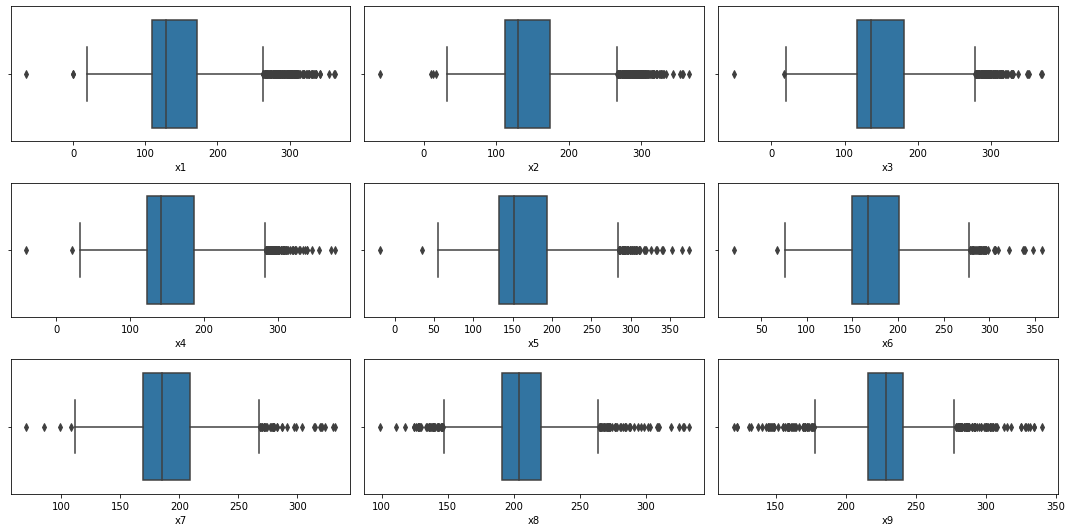

In [ ]:

fig, axs = plt.subplots(3,3, figsize = (15,7.5))
plt1 = sns.boxplot(x_data['x1'], ax = axs[0,0])
plt2 = sns.boxplot(x_data['x2'], ax = axs[0,1])
plt3 = sns.boxplot(x_data['x3'], ax = axs[0,2])
plt4 = sns.boxplot(x_data['x4'], ax = axs[1,0])
plt5 = sns.boxplot(x_data['x5'], ax = axs[1,1])
plt6 = sns.boxplot(x_data['x6'], ax = axs[1,2])
plt7 = sns.boxplot(x_data['x7'], ax = axs[2,0])
plt8 = sns.boxplot(x_data['x8'], ax = axs[2,1])
plt9 = sns.boxplot(x_data['x9'], ax = axs[2,2])
plt.tight_layout()

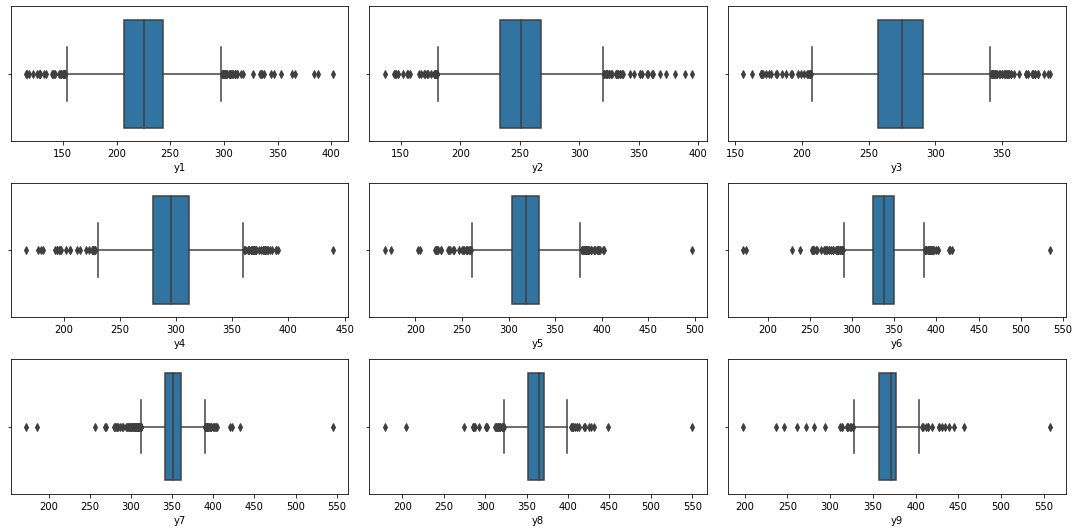

In [ ]:

fig, axs = plt.subplots(3,3, figsize = (15,7.5))
plt1 = sns.boxplot(y_data['y1'], ax = axs[0,0])
plt2 = sns.boxplot(y_data['y2'], ax = axs[0,1])
plt3 = sns.boxplot(y_data['y3'], ax = axs[0,2])
plt4 = sns.boxplot(y_data['y4'], ax = axs[1,0])
plt5 = sns.boxplot(y_data['y5'], ax = axs[1,1])
plt6 = sns.boxplot(y_data['y6'], ax = axs[1,2])
plt7 = sns.boxplot(y_data['y7'], ax = axs[2,0])
plt8 = sns.boxplot(y_data['y8'], ax = axs[2,1])
plt9 = sns.boxplot(y_data['y9'], ax = axs[2,2])
plt.tight_layout()

ValueError: ignored

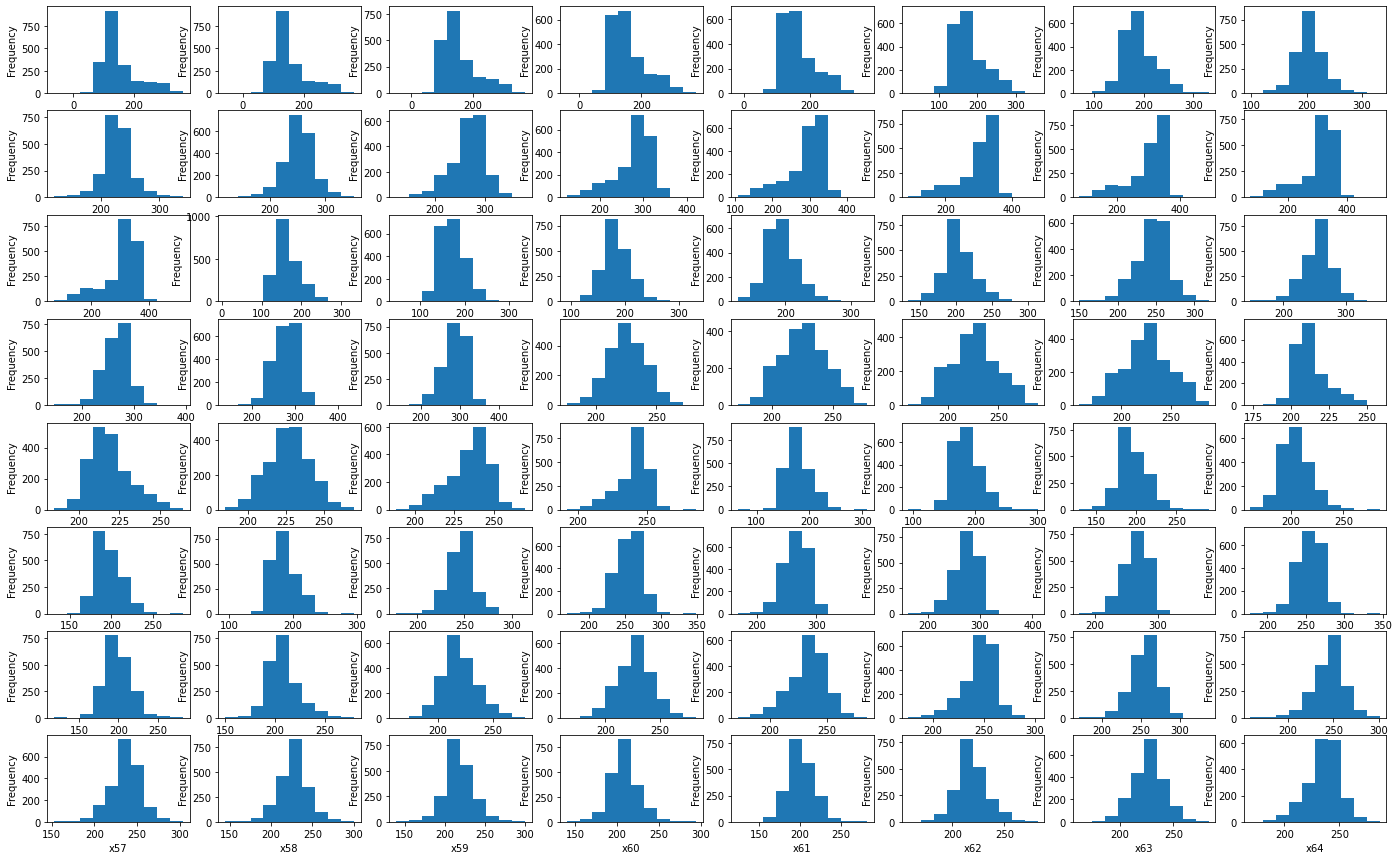

In [ ]:
# histogram of X point 
# select numeric variables
numeric_vars =  x_data.columns
# create histograms for each numeric variable
fig = plt.figure(figsize=(24, 15))
for i in range(len(numeric_vars)):
    var = numeric_vars[i]
    sub = fig.add_subplot(8, 8, i + 1)
    sub.set_xlabel(var)
    x_data[var].plot(kind = 'hist')

ValueError: ignored

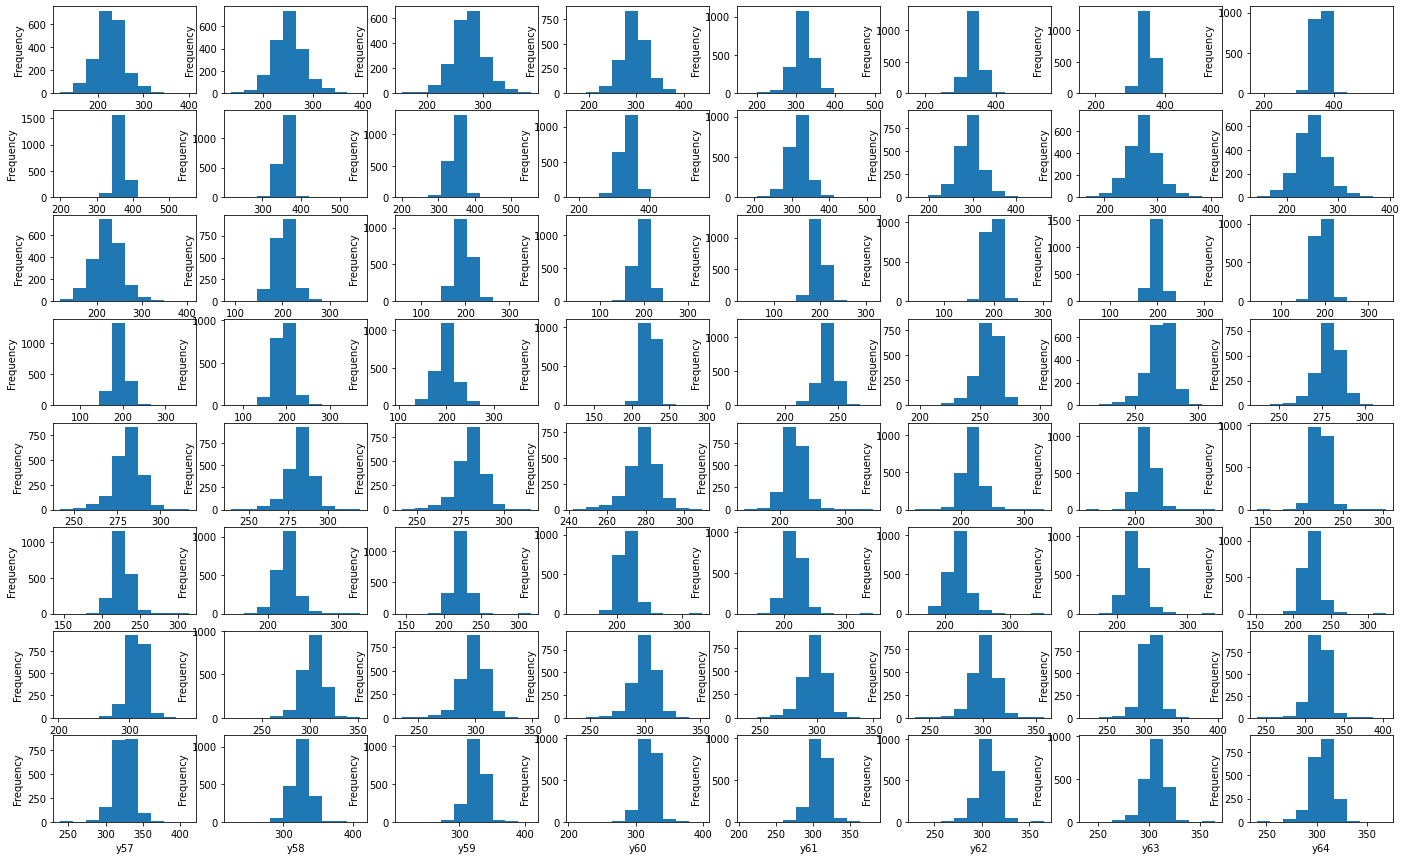

In [ ]:
# histogram of y point 
numeric_vars =  y_data.columns
# create histograms for each numeric variable
fig = plt.figure(figsize=(24, 15))
for i in range(len(numeric_vars)):
    var = numeric_vars[i]
    sub = fig.add_subplot(8, 8, i + 1)
    sub.set_xlabel(var)
    y_data[var].plot(kind = 'hist')

ValueError: ignored

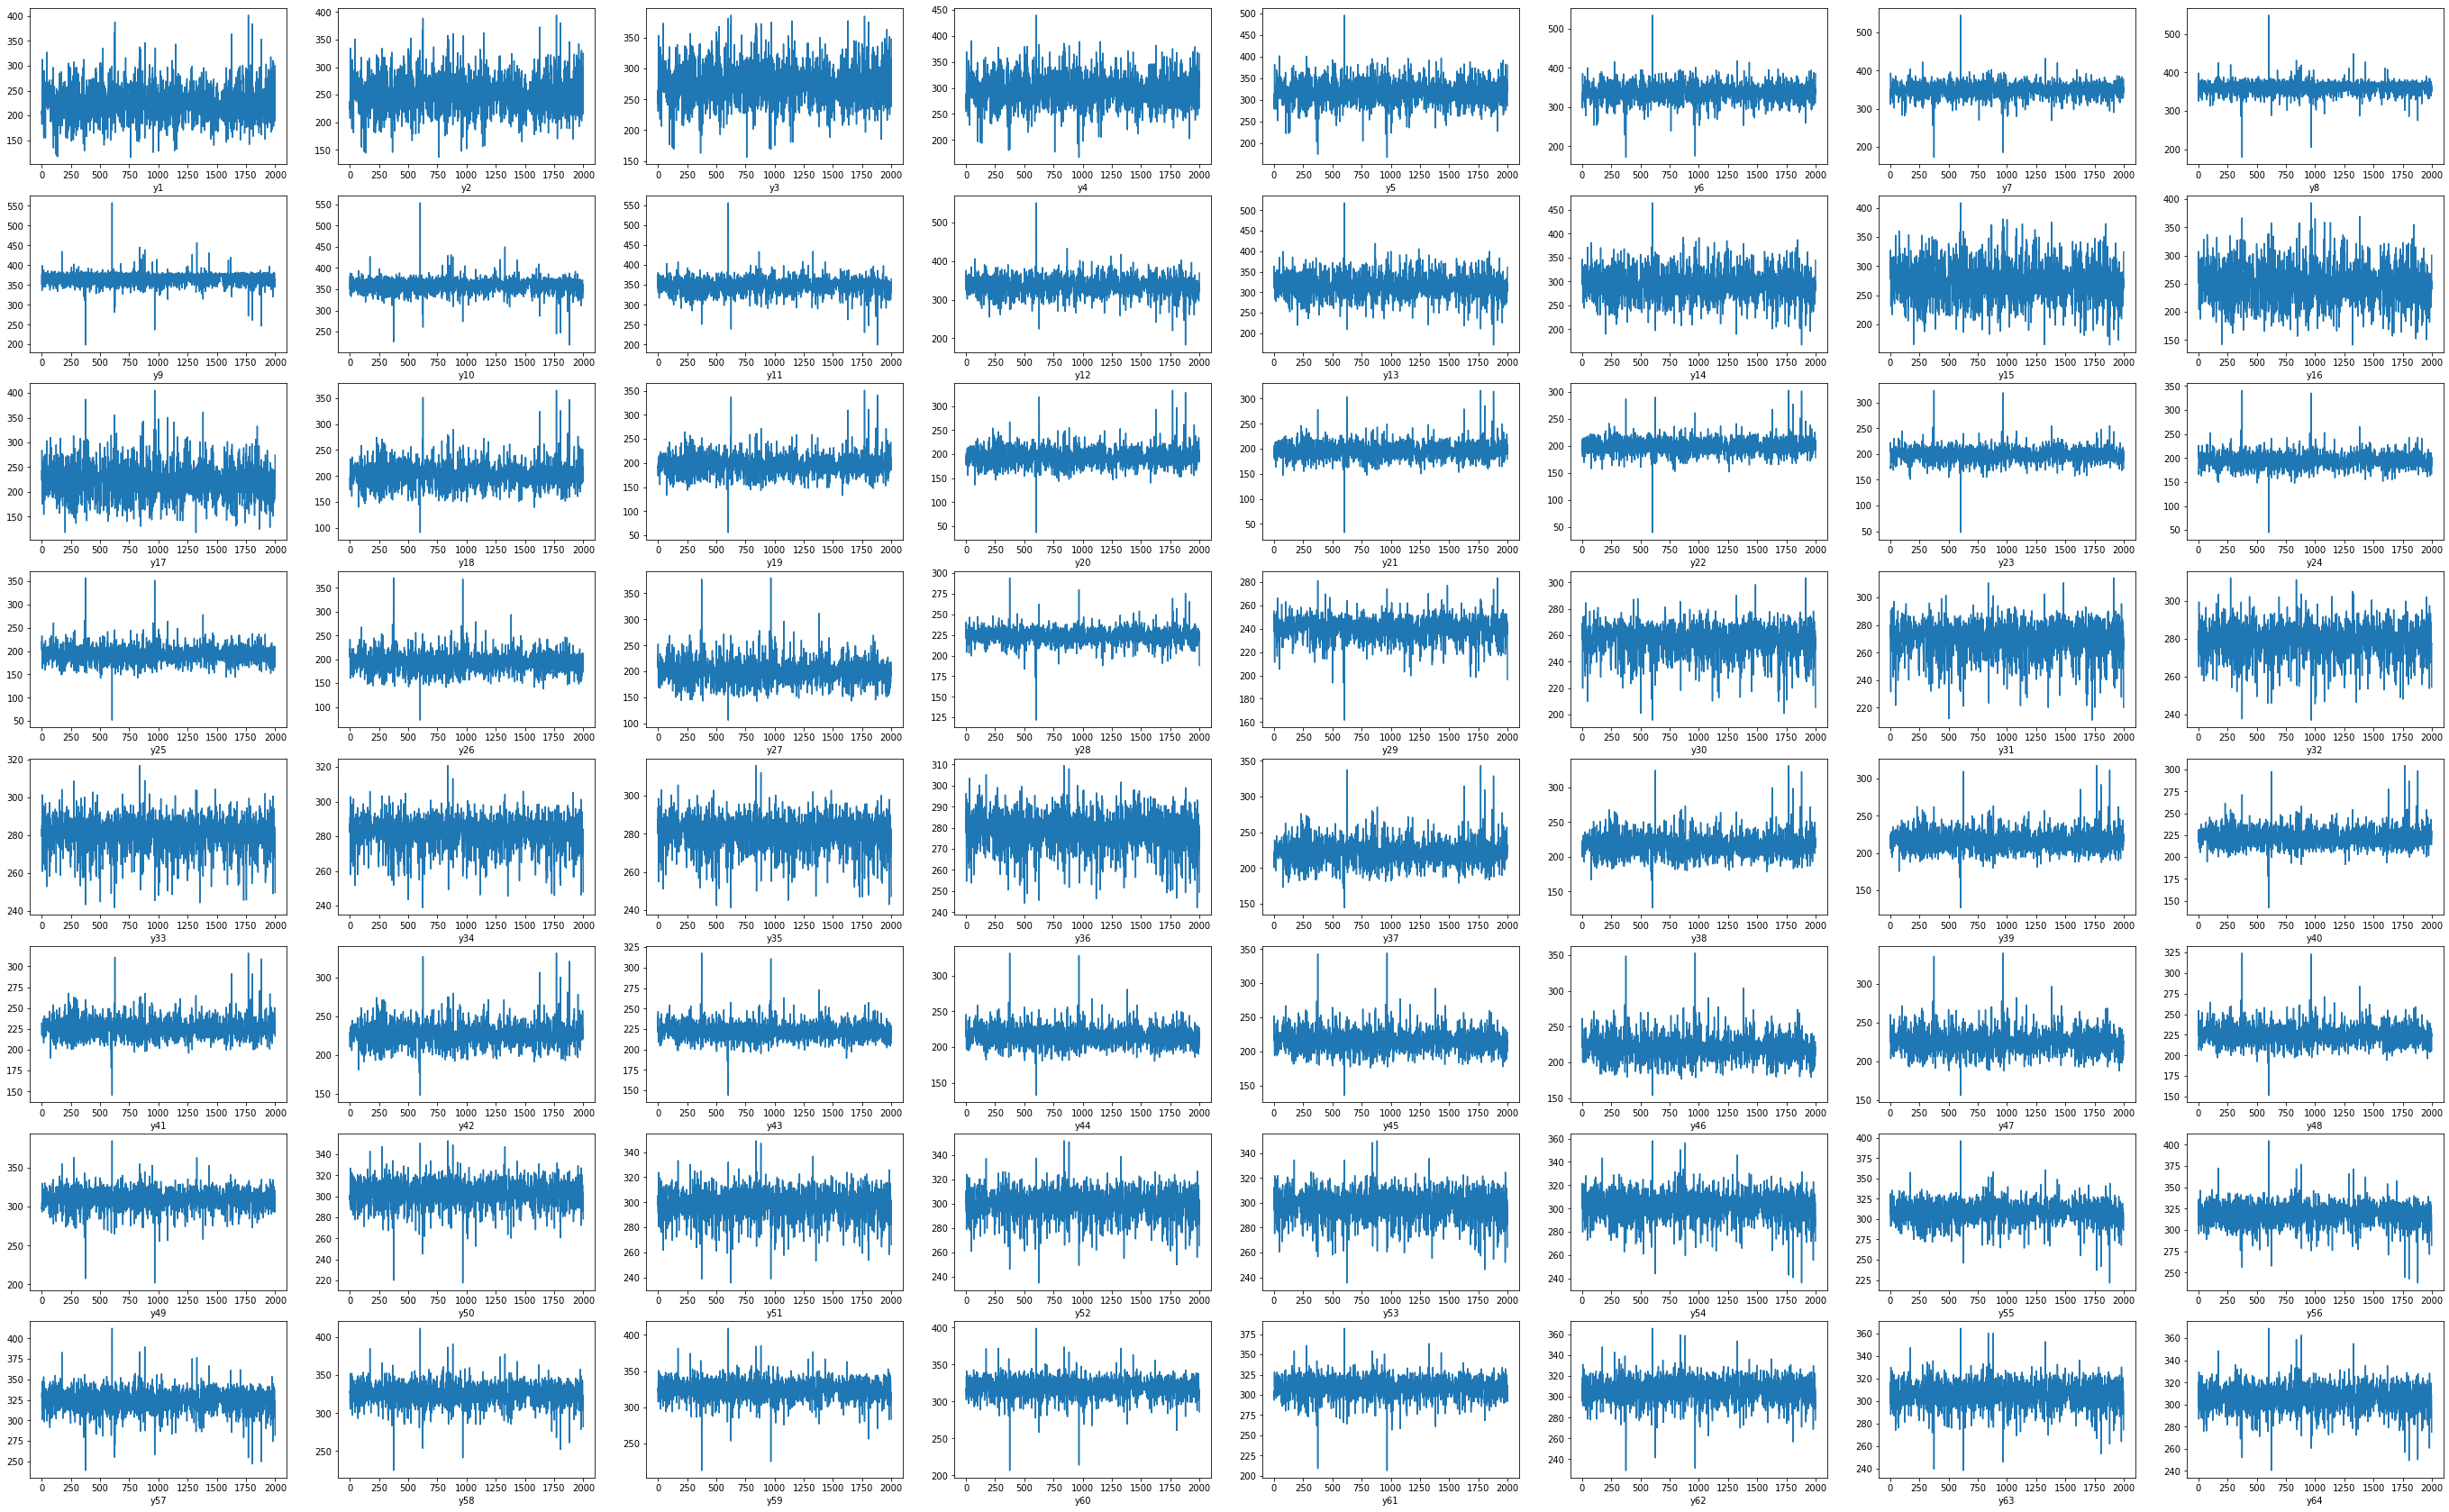

In [ ]:
# Line  of y point 
numeric_vars =  y_data.columns
# create histograms for each numeric variable
fig = plt.figure(figsize=(48, 30))
for i in range(len(numeric_vars)):
    var = numeric_vars[i]
    sub = fig.add_subplot(8, 8, i + 1)
    sub.set_xlabel(var)
    y_data[var].plot(kind = 'line')

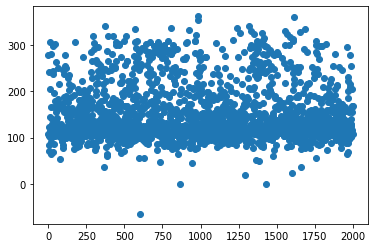

In [ ]:
x_data['x1'].plot(kind='line',marker='o',linestyle='None')

##4- Applying all scalers and PCA 

 PCA with no Scaler

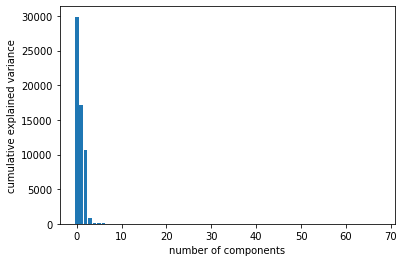

In [ ]:
 
model = PCA()
pca_df=model.fit(x_data)

# plt.plot(np.cumsum(pca.explained_variance_ratio_))
features =range(pca_df.n_components_)
plt.bar(features,pca_df.explained_variance_)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

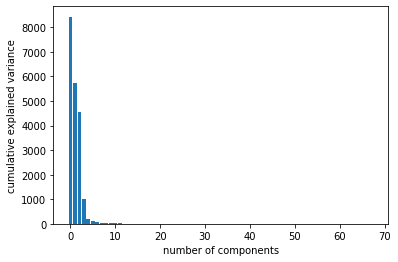

In [ ]:

model = PCA()
pca_df=model.fit(y_data)

# plt.plot(np.cumsum(pca.explained_variance_ratio_))
features =range(pca_df.n_components_)
plt.bar(features,pca_df.explained_variance_)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

PCA with MinMax Scaler  

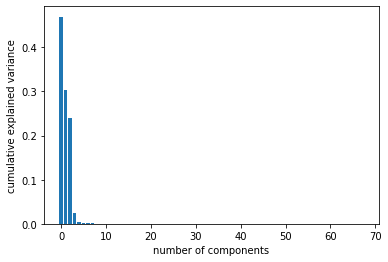

In [ ]:
# MinMax 
scaler = MinMaxScaler().fit(x_data)
df_scaled = scaler.transform(x_data)

# print(df_final.head())
model = PCA()
pca_df=model.fit(df_scaled)

# plt.plot(np.cumsum(pca.explained_variance_ratio_))
features =range(pca_df.n_components_)
plt.bar(features,pca_df.explained_variance_)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

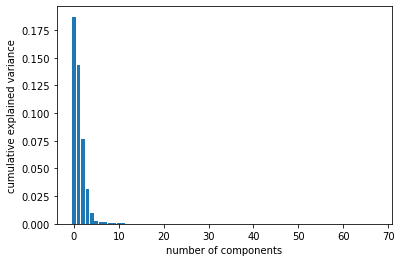

In [ ]:
# MinMax 
scaler = MinMaxScaler().fit(y_data)
df_scaled = scaler.transform(y_data)

# print(df_final.head())
model = PCA()
pca_df=model.fit(df_scaled)

# plt.plot(np.cumsum(pca.explained_variance_ratio_))
features =range(pca_df.n_components_)
plt.bar(features,pca_df.explained_variance_)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

 PCA with Standard Scaler 

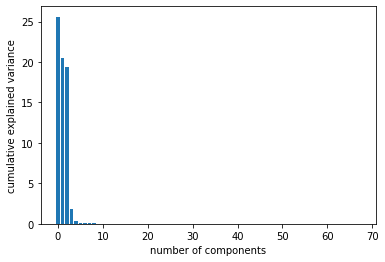

In [ ]:
# Standard 
scaler = StandardScaler().fit(x_data)
df_scaled = scaler.transform(x_data)

# print(df_final.head())
model = PCA()
pca_df=model.fit(df_scaled)

# plt.plot(np.cumsum(pca.explained_variance_ratio_))
features =range(pca_df.n_components_)
plt.bar(features,pca_df.explained_variance_)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

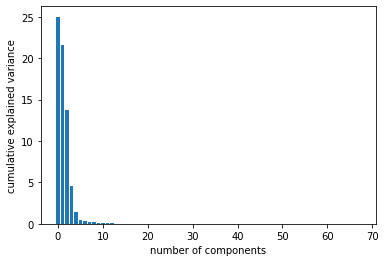

In [ ]:
# Standard 
scaler = StandardScaler().fit(y_data)
df_scaled = scaler.transform(y_data)

# print(df_final.head())
model = PCA()
pca_df=model.fit(df_scaled)

# plt.plot(np.cumsum(pca.explained_variance_ratio_))
features =range(pca_df.n_components_)
plt.bar(features,pca_df.explained_variance_)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

 PCA with Robust Scaler

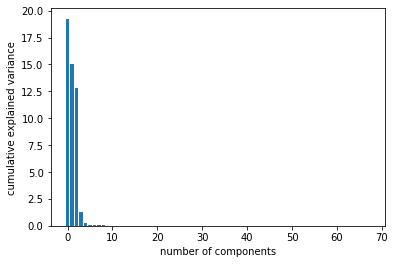

In [ ]:
# Robust
scaler = RobustScaler().fit(x_data)
df_scaled = scaler.transform(x_data)

# print(df_final.head())
model = PCA()
pca_df=model.fit(df_scaled)

# plt.plot(np.cumsum(pca.explained_variance_ratio_))
features =range(pca_df.n_components_)
plt.bar(features,pca_df.explained_variance_)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

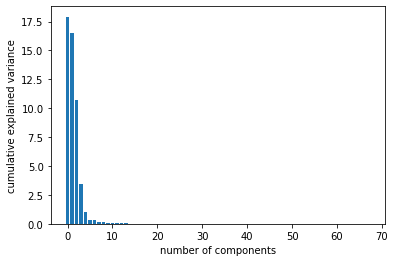

In [ ]:
# Robust
scaler = RobustScaler().fit(y_data)
df_scaled = scaler.transform(y_data)

# print(df_final.head())
model = PCA()
pca_df=model.fit(df_scaled)

# plt.plot(np.cumsum(pca.explained_variance_ratio_))
features =range(pca_df.n_components_)
plt.bar(features,pca_df.explained_variance_)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

 PCA with Normalizer 

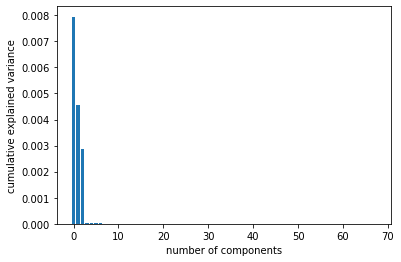

In [ ]:
# Normalizer
scaler = Normalizer().fit(x_data)
df_scaled = scaler.transform(x_data)

# print(df_final.head())
model = PCA()
pca_df=model.fit(df_scaled)

# plt.plot(np.cumsum(pca.explained_variance_ratio_))
features =range(pca_df.n_components_)
plt.bar(features,pca_df.explained_variance_)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

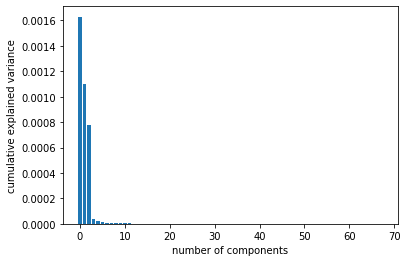

In [ ]:
# Normalizer
scaler = Normalizer().fit(y_data)
df_scaled = scaler.transform(y_data)

# print(df_final.head())
model = PCA()
pca_df=model.fit(df_scaled)

# plt.plot(np.cumsum(pca.explained_variance_ratio_))
features =range(pca_df.n_components_)
plt.bar(features,pca_df.explained_variance_)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

## **Testing the extracted 68 point on a image**

In [ ]:
img = cv2.imread('/content/drive/MyDrive/Head Pose Estimation ML Project/Dataset/Images/image00013.jpg')


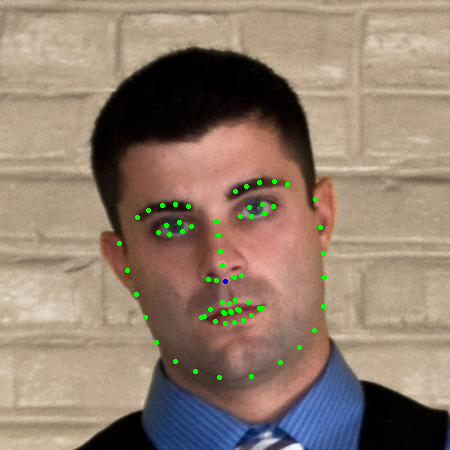

In [ ]:
image = cv2.cvtColor(cv2.flip(img, 1), cv2.COLOR_BGR2RGB)

# To improve performance
image.flags.writeable = False

# Drawing each point like a circle on the img 
for n in range(0, 68):
    x = x_data.iloc[1510,n]
    y = y_data.iloc[1510,n]
    
    cv2.circle(img, (int(x), int(y)), 1, (0, 255, 0), 2)

# Specfied a color for the point (34)  as a nose point with different color 

x_nose = x_data.iloc[1510,33]
y_nose = y_data.iloc[1510,33]

cv2.circle(img, (int(x_nose), int(y_nose)), 1, (255,0, 0), 2)

#Showing the image 
cv2_imshow(img)


In [ ]:
# Viweing the row of the image above 

full_data_df[full_data_df['img']=='image00013']

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,y63,y64,y65,y66,y67,y68,yaw,pitch,roll,img
1510,119.97587,127.61324,136.80798,145.48795,156.99094,175.41756,195.80457,219.37863,251.17346,280.55237,...,311.10312,309.97055,308.3068,310.3062,312.0515,313.14923,0.685565,-1.536199,-12.643008,image00013


## Normalinze the points of x & y 

**1- first substract each point from the nose point (centarizing all point around it) making the nose like (0,0)**

**the nose point ( x34 , y34 ) = and by index its 33 in order**

In [ ]:
y_normalized = y_data.iloc[:,:].sub(y_data.iloc[:,33].values, axis='rows')

In [ ]:
x_normalized = x_data.iloc[:,:].sub(x_data.iloc[:,33].values, axis='rows')

In [ ]:
#checking it should equal to 0
x_normalized['x34']

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
1995    0.0
1996    0.0
1997    0.0
1998    0.0
1999    0.0
Name: x34, Length: 2000, dtype: float64

**2- caclulating the distance between to specfic points to divide on it later**

In [ ]:
x_normalized['dist'] = x_normalized['x30'] - x_normalized['x34']
x_normalized['dist']

0      -14.73386
1        6.90683
2       21.38427
3       -8.51352
4       -5.74638
          ...   
1995    -8.46209
1996     7.74505
1997    -7.24352
1998    -8.27733
1999    -3.83700
Name: dist, Length: 2000, dtype: float64

In [ ]:
y_normalized['dist'] = y_normalized['y30'] - y_normalized['y34']
y_normalized['dist'].head()

0   -18.04520
1   -25.65860
2   -24.15534
3   -16.23465
4   -38.42358
Name: dist, dtype: float64

**3- dividing each point on that distance**

In [ ]:
x_normalized.iloc[:,:] = x_normalized.iloc[:,:].divide(x_normalized.dist.values,axis=0)

In [ ]:
y_normalized.iloc[:,:] = y_normalized.iloc[:,:].divide(y_normalized.dist.values,axis=0)

In [ ]:
# Checking 
x_normalized['x34']

0      -0.0
1       0.0
2       0.0
3      -0.0
4      -0.0
       ... 
1995   -0.0
1996    0.0
1997   -0.0
1998   -0.0
1999   -0.0
Name: x34, Length: 2000, dtype: float64

## Saving the new data after Normalization 

**Concating the x and y with the labels into one DataFrame**

In [ ]:
x_normed = x_normalized.drop(['dist'],axis=1)
y_normed = y_normalized.drop(['dist'],axis=1)

In [ ]:
y_normed.head()

,y1,y2,y3,y4,y5,y6,y7,y8,y9,y10,...,y59,y60,y61,y62,y63,y64,y65,y66,y67,y68
0,4.636274,3.510228,2.440370,1.427016,0.228546,-0.950868,-1.964881,-2.964801,-3.651937,-3.608493,...,-2.038924,-1.598671,-1.006788,-1.132356,-1.245798,-1.392814,-1.754749,-1.792837,-1.696538,-1.504173
1,2.811514,1.701375,0.671753,-0.224911,-1.217634,-2.084339,-2.683313,-3.314628,-3.711466,-3.481616,...,-1.721483,-1.336780,-0.618322,-0.835664,-0.871999,-0.916703,-0.979470,-1.439022,-1.439693,-1.327242
2,4.511864,3.477668,2.496554,1.513640,0.348689,-0.801694,-1.753682,-2.609965,-3.449001,-3.738154,...,-1.304215,-0.913959,-0.379757,-0.863281,-1.049841,-1.209193,-1.636345,-1.388303,-1.213664,-0.997302
3,4.600919,3.443194,2.357458,1.348524,0.188568,-0.941298,-1.821810,-2.661209,-3.323581,-3.363046,...,-1.587586,-1.218902,-0.697272,-0.874959,-0.987422,-1.106014,-1.428304,-1.371690,-1.286928,-1.124893
4,0.818927,-0.027512,-0.781489,-1.444360,-2.125237,-2.616460,-2.834936,-2.962621,-2.981244,-2.695178,...,-1.363206,-1.286079,-1.136734,-0.893743,-0.835503,-0.812734,-0.875072,-0.922196,-0.977418,-1.002381


In [ ]:
data68_normed = pd.concat([x_normed,y_normed,labels_df,full_data_df['img']],axis=1)

In [ ]:
data68_normed

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,y63,y64,y65,y66,y67,y68,yaw,pitch,roll,img
0,-4.516406,-4.694408,-4.966658,-5.116840,-4.899222,-4.291945,-3.338336,-2.725907,-2.724630,-3.557119,...,-1.245798,-1.392814,-1.754749,-1.792837,-1.696538,-1.504173,69.062935,-48.795550,-31.882296,image03258
1,-18.349584,-18.301546,-17.696270,-17.037867,-15.840671,-13.422931,-10.456696,-6.950830,-2.405862,1.671249,...,-0.871999,-0.916703,-0.979470,-1.439022,-1.439693,-1.327242,-13.392587,-6.686405,5.489456,image03247
2,-5.993490,-5.992329,-6.006529,-5.821882,-5.267613,-4.182640,-2.863181,-1.780554,-1.383697,-1.849100,...,-1.049841,-1.209193,-1.636345,-1.388303,-1.213664,-0.997302,-82.824690,-31.047533,61.351288,image03252
3,-2.153387,-2.105889,-2.268408,-2.257428,-1.984311,-1.483653,-0.905346,-0.712981,-1.780992,-3.831073,...,-0.987422,-1.106014,-1.428304,-1.371690,-1.286928,-1.124893,47.252384,-21.523932,0.100378,image03237
4,20.911595,19.653129,17.822614,16.031195,13.894038,10.917783,7.705328,3.491722,-2.853605,-9.149698,...,-0.835503,-0.812734,-0.875072,-0.922196,-0.977418,-1.002381,3.578812,5.349906,-7.209053,image03250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1.252546,1.152462,0.780572,0.505211,0.361178,0.434474,0.542079,0.017909,-1.731840,-4.508692,...,-0.750424,-0.740263,-0.932501,-1.499209,-1.574829,-1.517188,33.251526,-2.656541,-1.353087,image00847
1996,-14.913485,-15.174673,-15.076445,-14.815942,-13.859827,-12.000587,-9.323533,-6.272985,-2.735377,0.361410,...,-1.205469,-1.214795,-1.183121,-1.365280,-1.376892,-1.287435,-13.596580,-18.861887,10.579597,image00841
1997,6.327998,5.958817,5.167144,4.582503,4.137251,3.505871,2.866492,1.604611,-1.736483,-5.913564,...,-0.934241,-0.930723,-1.064026,-0.986653,-1.007354,-1.036953,20.222668,1.911799,-3.602211,image00844
1998,6.629602,6.177899,5.398421,4.678106,3.796549,2.748859,1.813017,0.408105,-2.316115,-5.403538,...,-0.811249,-0.753356,-0.644950,-1.255579,-1.356846,-1.325362,16.534338,-6.023523,-8.897713,image00855


In [ ]:
data68_normed.to_csv('/content/drive/MyDrive/Head Pose Estimation ML Project/Dataset/Data/data68_normed.csv',index=False)

In [ ]:
data68_normed.describe()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,y62,y63,y64,y65,y66,y67,y68,yaw,pitch,roll
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,-547.272929,-529.722537,-492.458789,-462.691325,-428.712070,-361.816396,-279.949891,-161.202766,13.992627,191.151192,...,-0.952727,-0.942375,-0.938341,-1.000615,-1.253986,-1.296133,-1.255262,0.806547,-6.138931,-1.975500
std,17745.553070,17171.035262,15924.164106,14929.418278,13862.392709,11691.373065,9020.121934,5139.774849,1242.872818,6885.707633,...,0.227192,0.193859,0.220952,0.511274,0.354913,0.348651,0.353173,37.482043,35.988570,41.024606
min,-660478.384550,-639039.384552,-589203.384557,-549502.538407,-515298.076872,-433598.307649,-330069.076890,-179742.538444,-19890.379312,-1845.152706,...,-5.956437,-6.523328,-4.738530,-6.594142,-3.821305,-5.372327,-4.961255,-351.226930,-713.745100,-972.272800
25%,-14.143409,-13.911387,-13.496352,-12.965667,-11.791716,-9.823888,-7.708404,-5.251560,-2.931053,-6.217640,...,-1.045612,-1.017682,-1.032344,-1.205801,-1.391067,-1.435217,-1.390046,-16.859081,-14.811133,-10.015671
50%,-4.693421,-4.873779,-5.071325,-5.080291,-4.725462,-4.007371,-2.848442,-1.990121,-2.159490,-2.443474,...,-0.946828,-0.931437,-0.932594,-1.017959,-1.202225,-1.231661,-1.200393,1.128854,-7.005438,-1.036931
75%,8.415482,7.904850,6.942615,5.942977,4.758707,3.420213,2.261875,0.797919,-1.340953,0.422172,...,-0.842664,-0.849917,-0.842205,-0.810039,-1.048850,-1.086869,-1.050028,19.177740,2.302842,7.699269
max,6293.203855,6174.649370,5844.088955,5482.661231,4906.139362,4326.115641,3717.028910,2439.217939,51885.230764,290293.230741,...,0.769984,0.037060,2.632464,8.023897,2.659085,0.096852,0.886773,187.786940,893.746500,333.999700


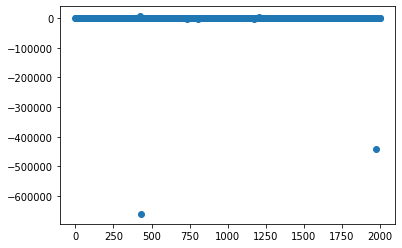

In [ ]:
data68_normed['x1'].plot(kind='line',marker='o',linestyle='None')


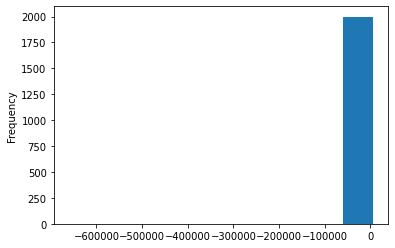

In [ ]:
data68_normed['x1'].plot(kind='hist')

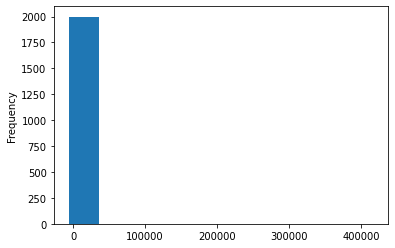

In [ ]:
data68_normed['x25'].plot(kind='hist')